<a href="https://colab.research.google.com/github/gauriiii13/MPR/blob/main/MPR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets


In [ ]:
import opendatasets as od
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import math
import seaborn as sns
import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow import keras

import seaborn as sns
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from keras import backend #Keras version 2.1.6
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Flatten, Concatenate, LeakyReLU, Input, Conv2D, MaxPooling2D
from keras.constraints import max_norm
from keras.regularizers import l2

from keras import layers

from keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing import image
#from PIL import Image

from sklearn.metrics import r2_score

%matplotlib inline

In [ ]:
od.download('https://www.kaggle.com/datasets/adarshrouniyar/air-pollution-image-dataset-from-india-and-nepal')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: gauribanga
Your Kaggle Key: ··········


100%|██████████| 606M/606M [00:09<00:00, 64.2MB/s]


In [ ]:
df=pd.read_csv('/content/air-pollution-image-dataset-from-india-and-nepal/Air Pollution Image Dataset/Air Pollution Image Dataset/Country_wise_Dataset/India/Delhi/Delhi_AQI_All_Info.csv')

In [ ]:
df.head()

,Location,Filename,Year,Month,Day,Hour,AQI,PM2.5,PM10,O3,CO,SO2,NO2,AQI_Class
0,"ITO, Delhi",DEL_VUnH_2023-02-04-17.00-1.jpg,2023,2,4,17:00,281,174,132,97,24,19,71.0,e_Very_Unhealthy
1,"ITO, Delhi",DL_VUNH_2023-02-04-17.00-1-1.jpg,2023,2,4,17:00,281,174,132,97,24,19,71.0,e_Very_Unhealthy
2,"ITO, Delhi",DL_VUNH_2023-02-04-17.00-1-10.jpg,2023,2,4,17:00,281,174,132,97,24,19,71.0,e_Very_Unhealthy
3,"ITO, Delhi",DL_VUNH_2023-02-04-17.00-1-11.jpg,2023,2,4,17:00,281,174,132,97,24,19,71.0,e_Very_Unhealthy
4,"ITO, Delhi",DL_VUNH_2023-02-04-17.00-1-12.jpg,2023,2,4,17:00,281,174,132,97,24,19,71.0,e_Very_Unhealthy


In [ ]:
df.shape

(2168, 14)

In [ ]:
df.tail()

,Location,Filename,Year,Month,Day,Hour,AQI,PM2.5,PM10,O3,CO,SO2,NO2,AQI_Class
2163,"ITO, Delhi",DEL_SEV_2023-02-07-14.00-2-18.jpg,2023,2,7,14:00,449,337,198,23,24,13,57.0,f_Severe
2164,"ITO, Delhi",DEL_SEV_2023-02-20-14.00-3-131.jpg,2023,2,20,14:00,363,257,139,41,65,35,83.0,f_Severe
2165,"ITO, Delhi",DEL_SEV_2023-02-20-14.00-3-121.jpg,2023,2,20,14:00,363,257,139,41,65,35,83.0,f_Severe
2166,"ITO, Delhi",DEL_VUnH_2023-02-16-17.00-2-87.jpg,2023,2,16,17:00,293,370,407,77,112,9,109.0,e_Very_Unhealthy
2167,"ITO, Delhi",DEL_VUnH_2023-02-16-14.30-1-204.jpg,2023,2,16,14:30,245,337,272,85,60,28,108.0,e_Very_Unhealthy


In [ ]:
df=shuffle(df)
df=df.sample(frac=1).reset_index(drop=True)
df

,Location,Filename,Year,Month,Day,Hour,AQI,PM2.5,PM10,O3,CO,SO2,NO2,AQI_Class
0,"ITO, Delhi",DEL_SEV_2023-02-07-14.00-1-38.jpg,2023,2,7,14:00,449,337,198,23,24,13,57.0,f_Severe
1,"ITO, Delhi",DEL_VUnH_2023-02-16-17.00-1-156.jpg,2023,2,16,17:00,293,370,407,77,112,9,109.0,e_Very_Unhealthy
2,"ITO, Delhi",DEL_SEV_2023-02-20-14.00-2-476.jpg,2023,2,20,14:00,363,257,139,41,65,35,83.0,f_Severe
3,"ITO, Delhi",DEL_VUnH_2023-02-16-14.30-1-98.jpg,2023,2,16,14:30,245,337,272,85,60,28,108.0,e_Very_Unhealthy
4,"ITO, Delhi",DEL_SEV_2023-02-22-14.00-2-536.jpg,2023,2,22,14:00,450,500,480,91,78,17,47.0,f_Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2163,"ITO, Delhi",DEL_SEV_2023-02-07-14.00-2-18.jpg,2023,2,7,14:00,449,337,198,23,24,13,57.0,f_Severe
2164,"ITO, Delhi",DEL_SEV_2023-02-20-14.00-3-131.jpg,2023,2,20,14:00,363,257,139,41,65,35,83.0,f_Severe
2165,"ITO, Delhi",DEL_SEV_2023-02-20-14.00-3-121.jpg,2023,2,20,14:00,363,257,139,41,65,35,83.0,f_Severe
2166,"ITO, Delhi",DEL_VUnH_2023-02-16-17.00-2-87.jpg,2023,2,16,17:00,293,370,407,77,112,9,109.0,e_Very_Unhealthy


In [ ]:
def build_x(path):
    train_img = []
    for i in range(df.shape[0]):
        img = image.load_img(path + '/' + df['Filename'][i].strip())
        img = image.img_to_array(img)
        img = tf.keras.applications.vgg16.preprocess_input(img)
        train_img.append(img)

    x = np.array(train_img)
    return x

In [ ]:
x_origin = build_x('/content/air-pollution-image-dataset-from-india-and-nepal/Air Pollution Image Dataset/Air Pollution Image Dataset/Combined_Dataset/All_img')

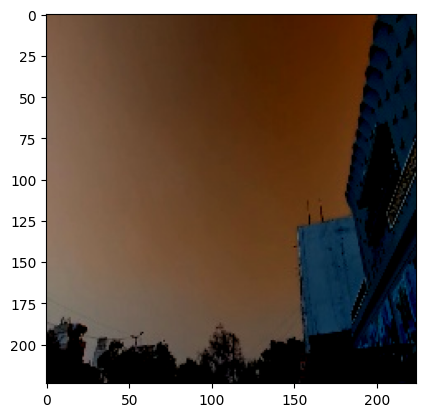

In [ ]:
plt.imshow(x_origin[10]/255)

In [ ]:
x_origin.shape

(2168, 224, 224, 3)

In [ ]:
aqi=pd.DataFrame(df['AQI'])

In [ ]:
aqi.head()

,AQI
0,449
1,293
2,363
3,245
4,450


In [ ]:
#splitting data into training data (80%) and 20% will be used for validation and testing
x_origin_train, x_origin_temp, y_train, y_temp = train_test_split(x_origin, aqi, train_size=0.8, shuffle=True)

In [ ]:
#now of the remaining 20%, 10% will be used for validation and 10% will be used as testing data
x_origin_valid, x_origin_test, y_valid, y_test = train_test_split(x_origin_temp, y_temp, test_size=0.5, shuffle=True)

In [ ]:
x_origin_train.shape

(1734, 224, 224, 3)

In [ ]:
y_train.shape

(1734, 1)

In [ ]:
y_test = y_test.reset_index(drop=True)
y_test

,AQI
0,450
1,179
2,179
3,293
4,449
...,...
212,363
213,281
214,268
215,363


In [ ]:
df.head()

,Location,Filename,Year,Month,Day,Hour,AQI,PM2.5,PM10,O3,CO,SO2,NO2,AQI_Class
0,"ITO, Delhi",DEL_SEV_2023-02-07-14.00-1-38.jpg,2023,2,7,14:00,449,337,198,23,24,13,57.0,f_Severe
1,"ITO, Delhi",DEL_VUnH_2023-02-16-17.00-1-156.jpg,2023,2,16,17:00,293,370,407,77,112,9,109.0,e_Very_Unhealthy
2,"ITO, Delhi",DEL_SEV_2023-02-20-14.00-2-476.jpg,2023,2,20,14:00,363,257,139,41,65,35,83.0,f_Severe
3,"ITO, Delhi",DEL_VUnH_2023-02-16-14.30-1-98.jpg,2023,2,16,14:30,245,337,272,85,60,28,108.0,e_Very_Unhealthy
4,"ITO, Delhi",DEL_SEV_2023-02-22-14.00-2-536.jpg,2023,2,22,14:00,450,500,480,91,78,17,47.0,f_Severe


In [ ]:
aqi_mapping = {
    'a_Good': 0,
    'b_Moderate': 1,
    'c_Unhealthy_for_Sensitive_Groups': 2,
    'd_Unhealthy': 3,
    'e_Very_Unhealthy': 4,
    'f_Severe': 5
}
df['AQI_NUMBER'] = df['AQI_Class'].map(aqi_mapping)
print(df)

        Location                             Filename  Year  Month  Day  \
0     ITO, Delhi    DEL_SEV_2023-02-07-14.00-1-38.jpg  2023      2    7   
1     ITO, Delhi  DEL_VUnH_2023-02-16-17.00-1-156.jpg  2023      2   16   
2     ITO, Delhi   DEL_SEV_2023-02-20-14.00-2-476.jpg  2023      2   20   
3     ITO, Delhi   DEL_VUnH_2023-02-16-14.30-1-98.jpg  2023      2   16   
4     ITO, Delhi   DEL_SEV_2023-02-22-14.00-2-536.jpg  2023      2   22   
...          ...                                  ...   ...    ...  ...   
2163  ITO, Delhi    DEL_SEV_2023-02-07-14.00-2-18.jpg  2023      2    7   
2164  ITO, Delhi   DEL_SEV_2023-02-20-14.00-3-131.jpg  2023      2   20   
2165  ITO, Delhi   DEL_SEV_2023-02-20-14.00-3-121.jpg  2023      2   20   
2166  ITO, Delhi   DEL_VUnH_2023-02-16-17.00-2-87.jpg  2023      2   16   
2167  ITO, Delhi  DEL_VUnH_2023-02-16-14.30-1-204.jpg  2023      2   16   

       Hour  AQI  PM2.5  PM10  O3   CO  SO2    NO2         AQI_Class  \
0     14:00  449    337   1

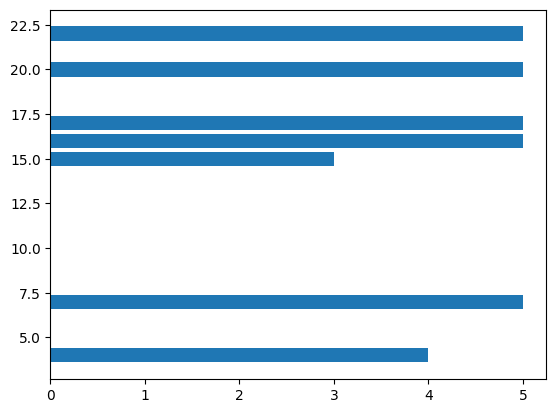

In [ ]:
plt.barh(df.Day, df.AQI_NUMBER)
plt.show()

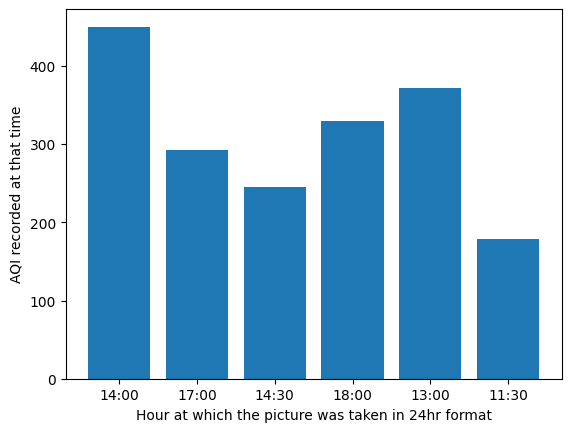

In [ ]:
plt.bar(df.Hour,df.AQI)
plt.xlabel("Hour at which the picture was taken in 24hr format")
plt.ylabel("AQI recorded at that time")
plt.show()

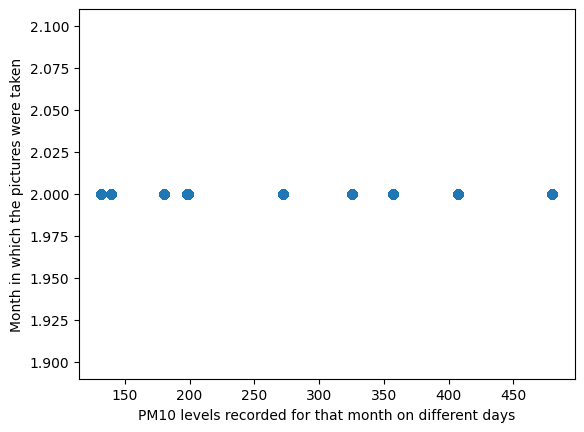

In [ ]:
plt.scatter(df.PM10,df.Month)
plt.ylabel("Month in which the pictures were taken")
plt.xlabel("PM10 levels recorded for that month on different days")
plt.show()

In [ ]:
df.describe()

,Year,Month,Day,AQI,PM2.5,PM10,O3,CO,SO2,NO2,AQI_NUMBER
count,2168.0,2168.0,2168.000000,2168.000000,2168.000000,2168.000000,2168.000000,2168.000000,2168.000000,2032.000000,2168.000000
mean,2023.0,2.0,15.021218,324.885148,330.119926,261.662362,60.602399,67.104705,19.262915,86.406496,4.431734
std,0.0,0.0,5.450665,75.933150,88.042159,117.394866,28.833875,28.647977,9.378916,23.194787,0.599144
min,2023.0,2.0,4.000000,179.000000,174.000000,132.000000,12.000000,24.000000,7.000000,47.000000,3.000000
25%,2023.0,2.0,15.000000,268.000000,257.000000,139.000000,41.000000,52.000000,10.000000,71.000000,4.000000
50%,2023.0,2.0,16.000000,293.000000,337.000000,199.000000,73.000000,65.000000,17.000000,83.000000,4.000000
75%,2023.0,2.0,20.000000,363.000000,370.000000,357.000000,85.000000,88.000000,28.000000,108.000000,5.000000
max,2023.0,2.0,22.000000,450.000000,500.000000,480.000000,97.000000,112.000000,35.000000,119.000000,5.000000


In [ ]:
#this is the pretrained model of vgg16 available in keras library, we will use this and create our own model
pre_trained_model  = tf.keras.applications.VGG16(input_shape=(224, 224, 3), include_top=False, weights="imagenet")
for layer in pre_trained_model.layers:
    layer.trainable = False
    print(layer.name)

58889256/58889256 [==============================] - 0s 0us/step
input_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


In [ ]:
#fine tuning the pre trained model
x1 = Flatten()(pre_trained_model.output)
fc1 = Dense(512, activation = 'relu', kernel_regularizer=l2(0.01))(x1)
dropout1 = Dropout(0.5)(fc1)
fc2 = Dense(512, activation = 'relu', kernel_regularizer=l2(0.01))(dropout1)
dropout2 = Dropout(0.5)(fc2)
x = Dense(1, activation='linear')(dropout2)
model = Model(pre_trained_model.input, x)

opt = tf.keras.optimizers.Adam(learning_rate=0.0001, clipnorm=1.0)
model.compile(loss='mse', optimizer=opt, metrics=['mae'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
weight_path="{}_aqi.best.hdf5".format('vgg16')

In [ ]:
#callbacks = [
 #   EarlyStopping(monitor='val_loss', patience=15, verbose=1, mode='auto'),
  #  ModelCheckpoint(weight_path, monitor='val_loss', verbose=1,save_freq="epoch",
   #ModelCheckpoint('model.h5', monitor='val_accuracy', verbose=1,
    #        save_best_only=True, mode='max', save_weights_only=False)


Epoch 1/80
109/109 [==============================] - ETA: 0s - loss: 6523.9741 - mae: 61.6404
Epoch 1: val_loss improved from inf to 1404.62280, saving model to vgg16_aqi.best.hdf5


109/109 [==============================] - 1098s 10s/step - loss: 6523.9741 - mae: 61.6404 - val_loss: 1404.6228 - val_mae: 26.3301
Epoch 2/80
109/109 [==============================] - ETA: 0s - loss: 3268.3013 - mae: 43.8996
Epoch 2: val_loss improved from 1404.62280 to 1261.21411, saving model to vgg16_aqi.best.hdf5


109/109 [==============================] - 1098s 10s/step - loss: 3268.3013 - mae: 43.8996 - val_loss: 1261.2141 - val_mae: 25.9720
Epoch 3/80
109/109 [==============================] - ETA: 0s - loss: 2941.5212 - mae: 42.3032
Epoch 3: val_loss improved from 1261.21411 to 843.44788, saving model to vgg16_aqi.best.hdf5


109/109 [==============================] - 1065s 10s/step - loss: 2941.5212 - mae: 42.3032 - val_loss: 843.4479 - val_mae: 20.6511
Epoch 4/80
109/109 [==============================] - ETA: 0s - loss: 2566.9412 - mae: 38.9448
Epoch 4: val_loss did not improve from 843.44788


109/109 [==============================] - 1089s 10s/step - loss: 2566.9412 - mae: 38.9448 - val_loss: 1311.6945 - val_mae: 28.1182
Epoch 5/80
109/109 [==============================] - ETA: 0s - loss: 2361.1599 - mae: 37.7406
Epoch 5: val_loss did not improve from 843.44788


109/109 [==============================] - 1093s 10s/step - loss: 2361.1599 - mae: 37.7406 - val_loss: 1506.2690 - val_mae: 30.1987
Epoch 6/80
109/109 [==============================] - ETA: 0s - loss: 2364.9158 - mae: 38.2412
Epoch 6: val_loss did not improve from 843.44788


109/109 [==============================] - 1087s 10s/step - loss: 2364.9158 - mae: 38.2412 - val_loss: 3027.2856 - val_mae: 46.6538
Epoch 7/80
109/109 [==============================] - ETA: 0s - loss: 2365.1682 - mae: 37.2107
Epoch 7: val_loss did not improve from 843.44788


109/109 [==============================] - 1092s 10s/step - loss: 2365.1682 - mae: 37.2107 - val_loss: 3739.7185 - val_mae: 54.7995
Epoch 8/80
109/109 [==============================] - ETA: 0s - loss: 2081.5901 - mae: 35.3350
Epoch 8: val_loss did not improve from 843.44788


109/109 [==============================] - 1063s 10s/step - loss: 2081.5901 - mae: 35.3350 - val_loss: 2272.6565 - val_mae: 39.9759
Epoch 9/80
109/109 [==============================] - ETA: 0s - loss: 2229.7505 - mae: 36.5856
Epoch 9: val_loss did not improve from 843.44788


109/109 [==============================] - 1089s 10s/step - loss: 2229.7505 - mae: 36.5856 - val_loss: 2735.2705 - val_mae: 44.4834
Epoch 10/80
109/109 [==============================] - ETA: 0s - loss: 2034.7645 - mae: 35.0087
Epoch 10: val_loss did not improve from 843.44788


109/109 [==============================] - 1091s 10s/step - loss: 2034.7645 - mae: 35.0087 - val_loss: 2690.3850 - val_mae: 44.8939
Epoch 11/80
109/109 [==============================] - ETA: 0s - loss: 2051.8625 - mae: 34.9803
Epoch 11: val_loss did not improve from 843.44788


109/109 [==============================] - 1089s 10s/step - loss: 2051.8625 - mae: 34.9803 - val_loss: 3965.1565 - val_mae: 55.6809
Epoch 12/80
109/109 [==============================] - ETA: 0s - loss: 2060.0400 - mae: 35.3079
Epoch 12: val_loss did not improve from 843.44788


109/109 [==============================] - 1092s 10s/step - loss: 2060.0400 - mae: 35.3079 - val_loss: 5556.7349 - val_mae: 68.2114
Epoch 13/80
109/109 [==============================] - ETA: 0s - loss: 1853.7310 - mae: 33.4480
Epoch 13: val_loss did not improve from 843.44788


109/109 [==============================] - 1088s 10s/step - loss: 1853.7310 - mae: 33.4480 - val_loss: 5088.7319 - val_mae: 64.9780
Epoch 13: early stopping


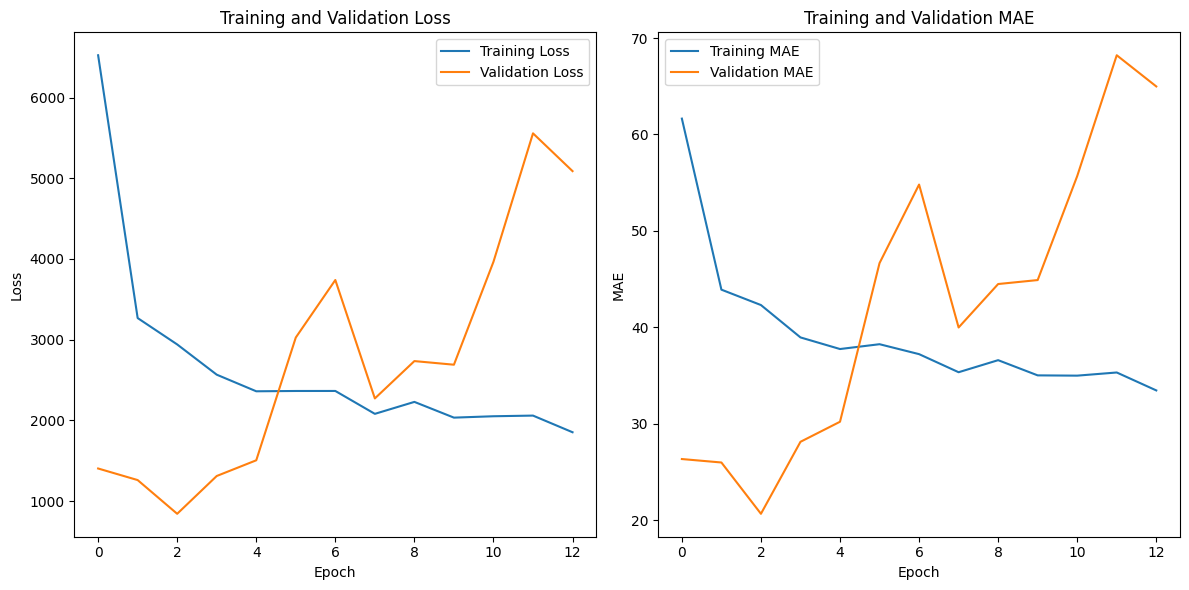

In [ ]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto'),
    ModelCheckpoint(weight_path, monitor='val_loss', verbose=1,save_freq="epoch",
                    save_best_only=True, mode='min', save_weights_only=True),
    ModelCheckpoint("model.hdf5", monitor='val_accuracy', verbose=1,
            save_best_only=True, mode='max', save_weights_only=False)
]

history = model.fit(
    x=x_origin_train, y=y_train,
    validation_data=(x_origin_valid, y_valid),
    batch_size=16, epochs=80,
    callbacks=callbacks
)

# Plot training and validation loss over epochs
plt.figure(figsize=(12, 6))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
# Plot validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training MAE (Mean Absolute Error)
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
# Plot validation MAE
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
model.load_weights(weight_path)

In [ ]:
loss = model.evaluate(x=x_origin_test, y=y_test, batch_size=32)
print('RMSE is :', loss[0] ** 0.5)

7/7 [==============================] - 118s 17s/step - loss: 1004.6310 - mae: 23.2084
RMSE is : 31.69591523336199


In [ ]:
y_predict = model.predict(x_origin_test)

7/7 [==============================] - 116s 16s/step


In [ ]:
r2_score(y_test, y_predict)

0.8308652819612738

In [ ]:
y_predict_aqi = np.zeros(len(y_predict))

for i in range(len(y_predict)):
    if y_predict[i] <= 50:
        y_predict_aqi[i] = 0
    elif y_predict[i] > 50 and y_predict[i] <= 100:
        y_predict_aqi[i] = 1
    elif y_predict[i] > 100 and y_predict[i] <= 150:
        y_predict_aqi[i] = 2
    elif y_predict[i] > 150 and y_predict[i] <= 200:
        y_predict_aqi[i] = 3
    elif y_predict[i] > 200 and y_predict[i] <= 300:
        y_predict_aqi[i] = 4
    elif y_predict[i] > 300:
        y_predict_aqi[i] = 5
    else:
        print('Exception Occured!')

y_predict_aqi = y_predict_aqi.astype(int)


y_predict_aqi

array([5, 3, 2, 5, 5, 5, 4, 5, 5, 5, 4, 5, 4, 4, 4, 5, 4, 4, 5, 4, 5, 5,
       5, 4, 5, 3, 5, 3, 3, 5, 5, 5, 5, 4, 4, 5, 5, 4, 5, 5, 5, 5, 5, 4,
       5, 5, 4, 5, 5, 4, 5, 4, 5, 5, 5, 5, 4, 5, 5, 4, 5, 4, 5, 4, 4, 5,
       4, 4, 5, 5, 5, 5, 4, 3, 5, 4, 4, 4, 5, 4, 5, 5, 4, 5, 5, 4, 4, 4,
       5, 4, 5, 5, 4, 5, 3, 4, 5, 5, 5, 4, 4, 4, 3, 5, 5, 5, 5, 5, 4, 5,
       4, 5, 5, 5, 5, 5, 4, 4, 3, 5, 5, 4, 3, 4, 4, 5, 4, 3, 5, 4, 3, 5,
       4, 4, 4, 5, 4, 5, 4, 5, 5, 4, 5, 3, 5, 4, 4, 4, 4, 4, 4, 5, 5, 4,
       5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 4, 4, 4, 5, 5, 5, 4, 5, 4, 5, 4,
       5, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 4, 5, 5, 5, 4, 5, 4, 5, 4, 5, 5,
       3, 5, 4, 5, 4, 4, 5, 5, 4, 5, 4, 5, 4, 5, 5, 5, 4, 5, 5])

In [ ]:
y_test = y_test.to_numpy().tolist()
y_test

[[450],
 [179],
 [179],
 [293],
 [449],
 [372],
 [281],
 [363],
 [363],
 [449],
 [293],
 [268],
 [293],
 [363],
 [293],
 [450],
 [281],
 [179],
 [450],
 [281],
 [363],
 [293],
 [450],
 [293],
 [363],
 [179],
 [293],
 [179],
 [179],
 [450],
 [372],
 [450],
 [281],
 [245],
 [281],
 [330],
 [293],
 [293],
 [363],
 [281],
 [372],
 [372],
 [363],
 [363],
 [449],
 [372],
 [268],
 [450],
 [245],
 [281],
 [330],
 [293],
 [449],
 [449],
 [450],
 [372],
 [268],
 [450],
 [449],
 [293],
 [281],
 [293],
 [372],
 [281],
 [245],
 [281],
 [281],
 [293],
 [363],
 [363],
 [363],
 [449],
 [245],
 [179],
 [363],
 [245],
 [245],
 [281],
 [363],
 [245],
 [363],
 [449],
 [293],
 [330],
 [363],
 [293],
 [268],
 [268],
 [363],
 [245],
 [363],
 [363],
 [268],
 [449],
 [179],
 [245],
 [281],
 [449],
 [363],
 [281],
 [268],
 [245],
 [179],
 [330],
 [372],
 [293],
 [372],
 [363],
 [293],
 [449],
 [293],
 [363],
 [281],
 [293],
 [450],
 [450],
 [281],
 [245],
 [179],
 [450],
 [363],
 [281],
 [179],
 [281],
 [293],


In [ ]:
y_test[1][0]

179

In [ ]:
y_test_aqi = np.zeros(len(y_test))

for i in range(len(y_test)):
    if int(y_test[i][0])  <= 50:
        y_test_aqi[i] = 0
    elif int(y_test[i][0]) > 50 and int(y_test[i][0]) <= 100:
        y_test_aqi[i] = 1
    elif int(y_test[i][0]) > 100 and int(y_test[i][0]) <= 150:
        y_test_aqi[i] = 2
    elif int(y_test[i][0]) > 150 and int(y_test[i][0]) <= 200 :
        y_test_aqi[i] = 3
    elif int(y_test[i][0]) > 200 and int(y_test[i][0]) <= 300:
        y_test_aqi[i] = 4
    elif int(y_test[i][0]) > 300:
        y_test_aqi[i] = 5
    else:
        print('Exception Occured!')

y_test_aqi = y_test_aqi.astype(int)


y_test_aqi

array([5, 3, 3, 4, 5, 5, 4, 5, 5, 5, 4, 4, 4, 5, 4, 5, 4, 3, 5, 4, 5, 4,
       5, 4, 5, 3, 4, 3, 3, 5, 5, 5, 4, 4, 4, 5, 4, 4, 5, 4, 5, 5, 5, 5,
       5, 5, 4, 5, 4, 4, 5, 4, 5, 5, 5, 5, 4, 5, 5, 4, 4, 4, 5, 4, 4, 4,
       4, 4, 5, 5, 5, 5, 4, 3, 5, 4, 4, 4, 5, 4, 5, 5, 4, 5, 5, 4, 4, 4,
       5, 4, 5, 5, 4, 5, 3, 4, 4, 5, 5, 4, 4, 4, 3, 5, 5, 4, 5, 5, 4, 5,
       4, 5, 4, 4, 5, 5, 4, 4, 3, 5, 5, 4, 3, 4, 4, 5, 4, 4, 5, 4, 3, 5,
       4, 4, 3, 5, 4, 5, 5, 5, 5, 4, 5, 4, 5, 4, 4, 4, 4, 4, 4, 5, 4, 5,
       5, 5, 5, 4, 5, 5, 5, 4, 5, 5, 5, 4, 5, 4, 5, 5, 5, 4, 4, 4, 5, 4,
       5, 5, 4, 4, 4, 5, 4, 5, 4, 5, 5, 4, 5, 5, 5, 4, 5, 4, 5, 4, 5, 5,
       3, 5, 4, 4, 4, 4, 5, 5, 4, 5, 4, 5, 4, 5, 5, 4, 4, 5, 5])

In [ ]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test_aqi, y_predict_aqi)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


0.8341021294726799

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_predict)
print(mae)

23.208367413639472


In [ ]:
t = 0
n = 0

for i in range(len(y_predict_aqi)):
    if y_predict_aqi[i] == y_test_aqi[i]:
        t = t + 1
    else:
        n = n + 1

acc = t / len(y_predict_aqi)

print('Acc: ', acc, ' True: ', t, ' False: ', n)

Acc:  0.8571428571428571  True:  186  False:  31


In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test_aqi, y_predict_aqi, average='macro')

0.6332759750901344

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_aqi, y_predict_aqi)

# Precision
precision = precision_score(y_test_aqi, y_predict_aqi, average='weighted', zero_division=1)

# Recall (Sensitivity or True Positive Rate)
recall = recall_score(y_test_aqi, y_predict_aqi, average='weighted', zero_division=1)

# Accuracy
accuracy = accuracy_score(y_test_aqi, y_predict_aqi)

# Print or use the metrics as measures of performance
print('Precision:', precision)
print('Recall:', recall)
print('Accuracy:', accuracy)

Precision: 0.8655764497194735
Recall: 0.8571428571428571
Accuracy: 0.8571428571428571


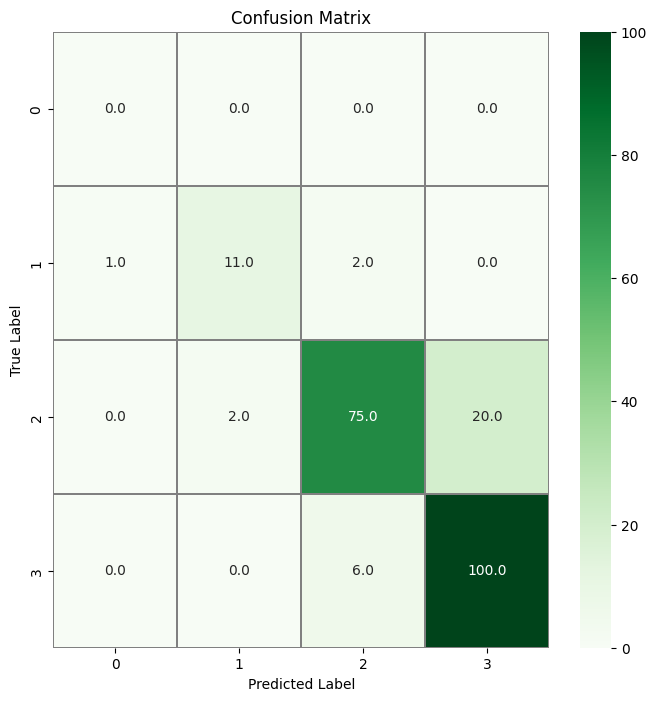

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
Y_pred_classes = y_predict_aqi
Y_true = y_test_aqi
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

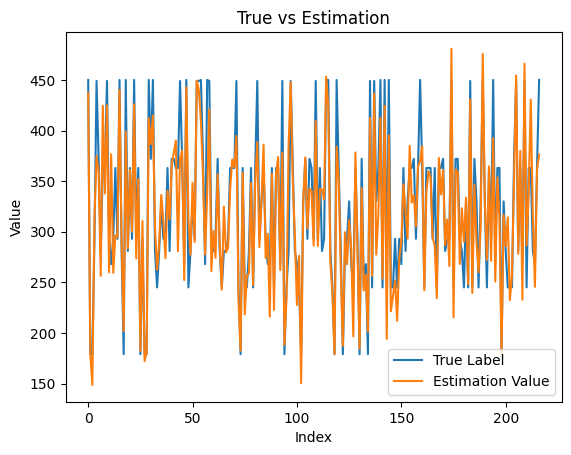

In [ ]:
plt.plot(y_test, label='True Label')
plt.plot(y_predict, label='Estimation Value')

# set the x-axis label
plt.xlabel('Index')

# set the y-axis label
plt.ylabel('Value')

# set the plot title
plt.title('True vs Estimation')

# Adding a legend
plt.legend()

# display the plot
plt.show()

In [ ]:
import pickle

In [ ]:
filename='trained_model.sav'
pickle.dump(model, open(filename, 'wb'))
#loading the saved model
loaded_model=pickle.load(open('trained_model.sav', 'rb'))

In [ ]:
from google.colab import files

In [ ]:
files.download('trained_model.sav')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>